<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab06_Planetary_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Planetary Motion

*written by Rose Finn*

*adapted from Giordano and Nakanishi, Chapter 4*


The goal of this lab is to model the motion of a planet orbiting a star.  We will start by modeling the Earth's motion around the Sun, but we write the code in such a way that it can be easily adapted to model other 2-body systems.

* In class, we reviewed the units that we will use in the lab, namely our distances will be in Astronomical Units (AU, where 1 AU is the mean distance between the Earth and Sun), and our time will be measured in years.

* We will assume that the Sun is fixed at a central position, and the Earth revolves around it.

In [1]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt


# Write the initialize function

Write a function called **initialize** that does the following.
* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, x, y, vx, vy arrays using `np.zeros`
  * set the first value of the x array to $x_0$
  * set the first value of the y array to $y_0$
  * set the first value of the vx array to $v_{0x}$
  * set the first value of the vy array to $v_{0y}$

* The function should return the following arrays *in this order*:
  * time array
  * x position array
  * y position array
  * x velocity array
  * y velocity array

In [2]:
# write your initialize function here
def initialize (x0, y0, vx0, vy0, tmax, dt):
  """
  Sets up initial arrays of zeros for x and y position and velocity and time, also sets any initial values

  INPUTS:
  x0 - initial x position
  y0 - initial y position
  vx0 - initial x velocity
  vy0 - initial y velocity
  tmax - total time
  dt - time step

  RETURNS:
  time - time array
  x - x position array
  y - y position array
  vx - x velocity array
  vy - y velocity array
"""
  nsteps = int(tmax/dt)

  time = np.zeros(nsteps)
  x = np.zeros(nsteps)
  y = np.zeros(nsteps)
  vx = np.zeros(nsteps)
  vy = np.zeros(nsteps)

  x[0] = x0
  y[0] = y0
  vx[0] = vx0
  vy[0] = vy0

  return time, x, y, vx, vy


# Distance Function

Write a function called **distance** to calculate the distance between the Earth and Sun given the Earth's x and y positions.  We assume throughout that the Sun is located at $x=0, y=0$, and that the Sun does not move.

Write a function called **distance** that does the following.
* Input
  * x position, $x$
  * y position, $y$

* The function should:
  *  calculate the distance between the Earth and Sun
  ```
  r = np.sqrt(x**2 + y**2)
  ```


* The function should return :
  * the distance $r$

In [3]:
# write your distance function here
def distance(x, y):
  """
  Calculates distance array using x and y array
  """
  r = np.sqrt(x**2 + y**2)
  return r

# Calculate function

Write a function called **calculate** that does the following.
* Input
  * time array, $time$
  * x position, $x$
  * y position, $y$
  * x velocity, $v_{x}$
  * y velocity, $v_{y}$
  * time step, $dt$
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * calculate vx, vy, and time
  * if ```cromer=True```, use the Euler-Cromer method to calculate x and y
  * if ```cromer=False```, use the Euler method to calculate x and y

* The function should return the following arrays *in this order*:
  * time array
  * $x$ position array
  * $y$ position array
  * $v_{x}$ velocity array
  * $v_{y}$ velocity array

In [12]:
# write your calculate function
def calculate(time, x, y, vx, vy, dt, cromer=True):
  for i in range(1,len(time)):
    time[i] = time[i-1] + dt
    vx[i] = vx[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * x[i-1]) * dt
    vy[i] = vy[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * y[i-1]) * dt

    if cromer == True:
      x[i] = x[i-1] + vx[i] * dt
      y[i] = y[i-1] + vy[i] * dt
    else:
      x[i] = x[i-1] + vx[i-1] * dt
      y[i] = y[i-1] + vy[i-1] * dt
  return time, x, y,vx, vy

# Function to make plots

Write a function called **make_plots** that does the following.
* Input
  * time array, $time$
  * x position, $x$
  * y position, $y$
  * x velocity, $v_{x}$
  * y velocity, $v_{y}$


* The function should:
  * set the figure size to (15,4)
  ```python
  plt.figure(figsize=(15,4))
  plt.subplots_adjust(wspace=.35)
  ```
  * use the ```plt.subplot``` command to make a plot with one row and three columns.
  * plot y vs x in the first panel using scatter, and color the points using the time array.  The following code snippet should help.  Note: we are using ```plt.axis('equal')``` so that the x and y axes are on the same scale.  This will make a circle look like a circle.
  ```
  plt.scatter(x,y,c=time,s=10)
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')
  ```
  * plot x, y, and the radius (```r = np.sqrt(x**2+y**2) ```) vs time in the second plot.
  * plot vx, vy, and the magnitude of the total velocity  (```v = np.sqrt(vx**2+vy**2) ```) vs time in the third plot.
  * be sure to label the axes in each plot, and use the correct units.
  * add a legend to the second and third panels.

* The function does not return anything.

In [19]:
# write your make_plots function here
def make_plots(time, x, y, vx, vy):
  plt.figure(figsize=(15,4))
  plt.subplots_adjust(wspace=.35)

  plt.subplot(1,3,1)
  plt.scatter(x,y,c=time,s=10)
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')
  plt.xlabel('Time (yr)')
  plt.ylabel('Position (au)')
  plt.legend()

  plt.subplot(1,3,2)
  plt.scatter(time, x, label='X Position')
  plt.scatter(time, y, label='Y Position')
  plt.scatter(time, distance(x,y), label='Radius')
  plt.xlabel('Time (yr)')
  plt.ylabel('Position (au)')
  plt.legend()

  plt.subplot(1,3,3)
  plt.scatter(time, vx, label='X Velocity')
  plt.scatter(time, vy, label='Y Velocity')
  plt.scatter(time, np.sqrt(vx**2 + vy**2), label='Total Velocity')
  plt.xlabel('Time (yr)')
  plt.ylabel(r'Velocity ($\frac{au}{yr}$)')
  plt.legend()

# main function

Write a function called **main** that does the following.  Note, this is different from how we have structured the main program in the past, but it will allow us to modify the parameters of the model easily.

* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * call **initialize**
  * call **calculate**
  * call **make_plots**


* The function should return the following arrays *in this order*:
  * time array
  * $x$ position array
  * $y$ position array
  * $v_{x}$ velocity array
  * $v_{y}$ velocity array

In [13]:
# write your main function here
def main(x0, y0, vx0, vy0, tmax, dt, cromer=True):
  time, x, y, vx, vy = initialize(x0, y0, vx0, vy0, tmax, dt)

  time, x, y, vx, vy = calculate(time, x, y, vx, vy, dt, cromer)

  make_plots(time, x, y, vx, vy)

  return time, x, y, vx, vy


# Run the program

(10 points)

In the cell below:

* define the initial values of x0, y0, v0x, and v0y
* define the value of tmax and dt
* then call main


<ipython-input-12-fe6ce71b3363>:5: RuntimeWarning: divide by zero encountered in divide
  vx[i] = vx[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * x[i-1]) * dt
<ipython-input-12-fe6ce71b3363>:6: RuntimeWarning: divide by zero encountered in divide
  vy[i] = vy[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * y[i-1]) * dt


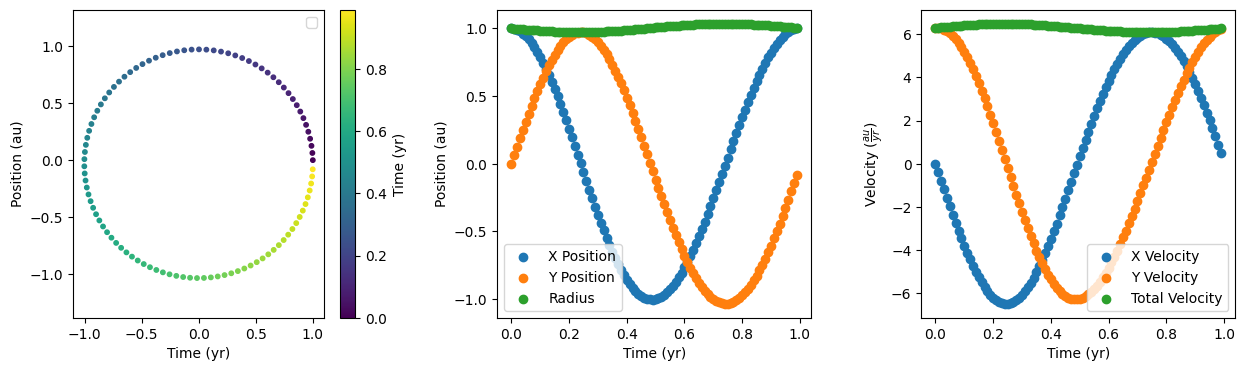

In [55]:
x0 =  1# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  2 * np.pi# initial y velocity in AU/yr
tmax = 1# time in years
dt = .01# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt)

### Question 1

Describe the Earth's orbit.  How does the radius change with time?  How does the magnitude of the velocity or speed change with time?

**Radius does not necessarily change with time. It remains fairly constant. The same can be said about the total velocity, there is very little to no change as time goes on.**

# Modifying the initial velocity

(10 points)

What if the Earth's velocity suddenly increased?  Would its orbit change?  If so, how?

This is a question that is challenging to solve analytically, but we can easily solve it numerically.

In the cell below, increase the initial velocity by one, and then rerun main.  

**Be sure to adjust `tmax` so that the planet completes at least one full orbit.**



<ipython-input-12-fe6ce71b3363>:5: RuntimeWarning: divide by zero encountered in divide
  vx[i] = vx[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * x[i-1]) * dt
<ipython-input-12-fe6ce71b3363>:6: RuntimeWarning: divide by zero encountered in divide
  vy[i] = vy[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * y[i-1]) * dt


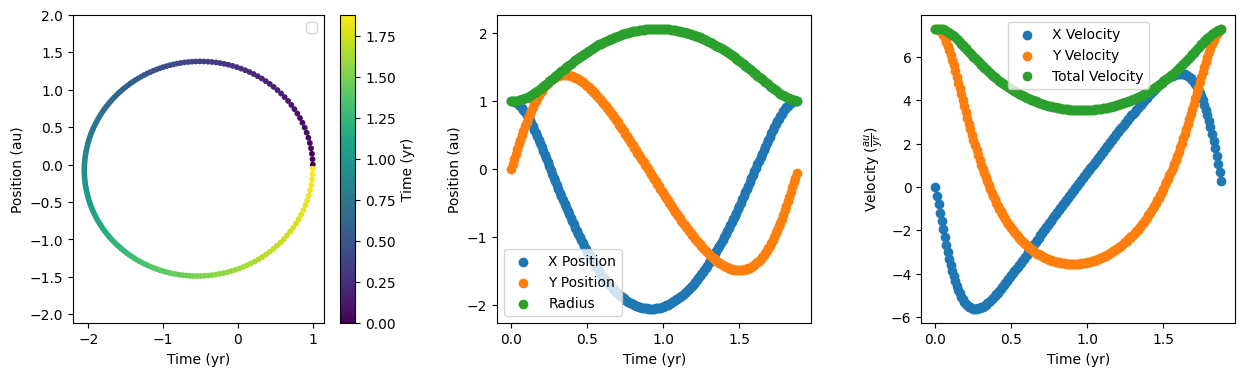

In [56]:
# write your code here to increase the initial velocity by one

x0 =  1# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  2 * np.pi + 1# initial y velocity in AU/yr
tmax = 1.89# time in years
dt = 0.01# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt)

Repeat this again, but this time decrease the initial velocity by one:
```python
v0y = 2*np.pi - 1
```

<ipython-input-12-fe6ce71b3363>:5: RuntimeWarning: divide by zero encountered in divide
  vx[i] = vx[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * x[i-1]) * dt
<ipython-input-12-fe6ce71b3363>:6: RuntimeWarning: divide by zero encountered in divide
  vy[i] = vy[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * y[i-1]) * dt


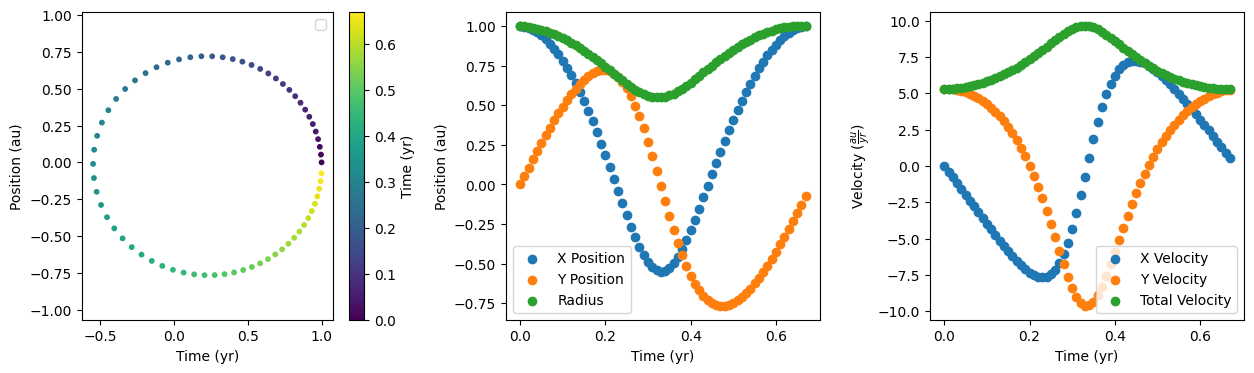

In [57]:
x0 =  1# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  2 * np.pi - 1# initial y velocity in AU/yr
tmax = .68# time in years
dt = 0.01# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt)

### Question 2

* Describe what happens to the Earth's orbit when you increase the initial velocity.  Describe how the distance between the Earth and Sun changes with time.  Describe how the Earth's speed changes with time. What is the relationship between speed and distance from the Sun? **Increasing the initial velocity causes the time it takes to complete the orbit to increase. The radius then increased as a result. The distance between the Earth and the Sun increased over time, peaking at the center and dipping back down towards the ends. This caused the velocity to decrease towards the middle of the orbit then increase towards the end. As distance from the sun increases, the speed decreases.**

* Describe what happens to the Earth's orbit when you decrease the initial velocity. Describe how the distance between the Earth and Sun changes with time.  Describe how the Earth's speed changes with time. What is the relationship between speed and distance from the Sun? **Decreasing the initial velocity causes the time it takes to complete the orbit to decrease. The radius then decreased as a result. The distance between the Earth and the Sun decreased over time, at it's lowest at the center and increasing back up towards the ends. This caused the velocity to increase towards the middle of the orbit then decrease towards the end. As distance from the sun decreases, the speed increases.**

* Kepler's 1st Law states that the planets orbit the Sun in elliptical orbits, with the Sun at one of the foci.  Are your modeling results consistent with Kepler's 1st Law?  What determines if a planet or other solar system body orbits in a circular or elliptical orbit? **Yes, the radius changes as a result of the different initial velocity. The changing radius means the orbit is not perfectly circle. With the radius being at it's highest/lowest at the center and then decreasing/increasing back to its starting value indicates an elliptical orbit. A perfectly circular orbit would have the exact same radius throughout.**

* Kepler's 2nd Law states that planets sweep out equal area in equal time.  This means that planets travel faster when they are closer to the Sun, and slower when they are further from the Sun.  Are your modeling results consistent with Kepler's 2nd Law? **Yes, the elliptical orbit indicates that faster velocity at a smaller radius but a slower velocity at a higher radius.**

# Stability of the Orbital Model

(5 points)

* In the cells below, rerun your model, but increase the total time to 2, 3, and 4 years.  Use the initial velocity of ```v0y = 2 np.pi```.


<ipython-input-12-fe6ce71b3363>:5: RuntimeWarning: divide by zero encountered in divide
  vx[i] = vx[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * x[i-1]) * dt
<ipython-input-12-fe6ce71b3363>:6: RuntimeWarning: divide by zero encountered in divide
  vy[i] = vy[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * y[i-1]) * dt


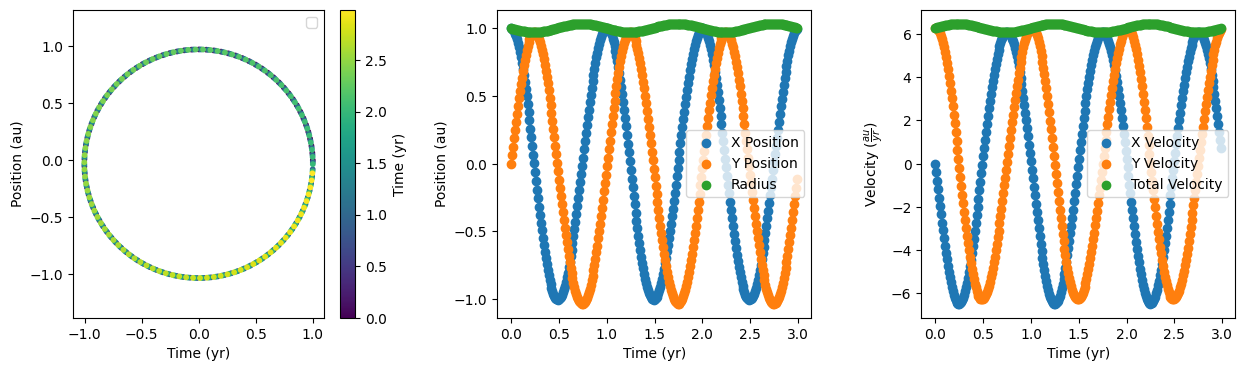

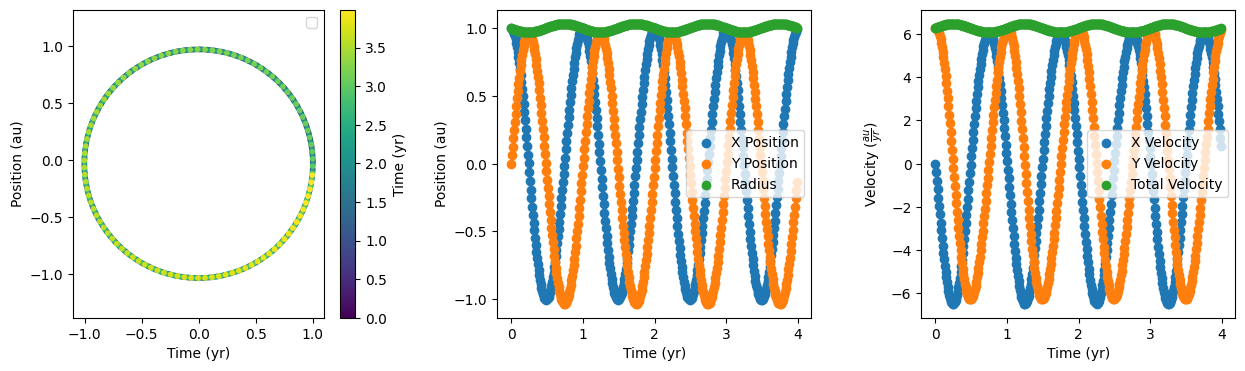

In [58]:
x0 =  1# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  2 * np.pi# initial y velocity in AU/yr
tmax = 3# time in years
dt = 0.01# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt)

x0 =  1# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  2 * np.pi# initial y velocity in AU/yr
tmax = 4# time in years
dt = 0.01# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt)

### Question 3

* Does the orbit stay stable?  If the orbit stays stable, then the points from multiple orbits will fall on top of each other. **The radius is stable in the sense that the points overlap. However the radius can be seen changing very slightly over time.**

# Euler vs Euler-Cromer Method

(5 points)

* In the cell below, rerun the initial model, but use the Euler method instead of the Euler-Cromer method.

* set tmax to 4 years to see if and how the orbit changes with time.



<ipython-input-12-fe6ce71b3363>:5: RuntimeWarning: divide by zero encountered in divide
  vx[i] = vx[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * x[i-1]) * dt
<ipython-input-12-fe6ce71b3363>:6: RuntimeWarning: divide by zero encountered in divide
  vy[i] = vy[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * y[i-1]) * dt


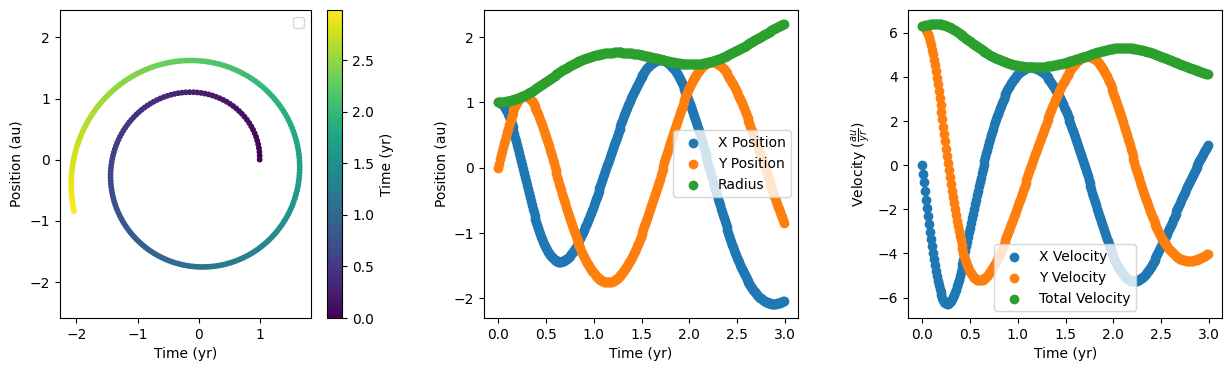

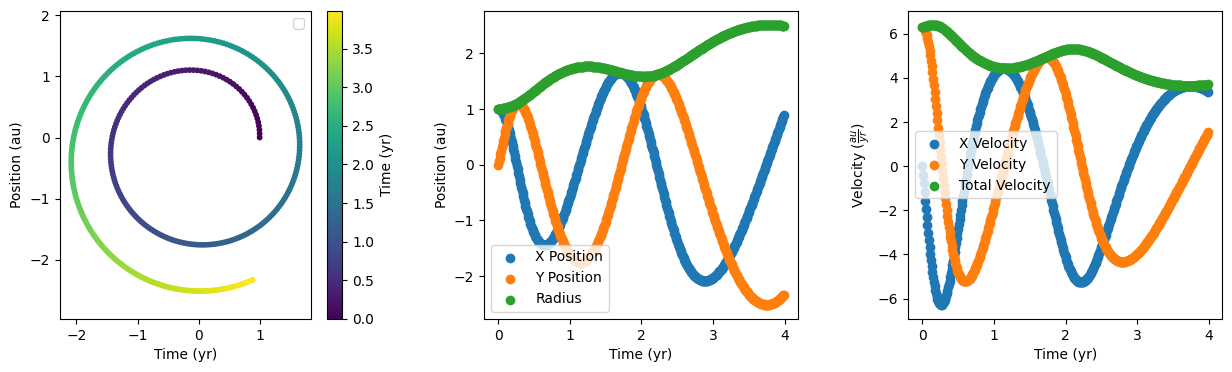

In [59]:
x0 =  1# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  2 * np.pi# initial y velocity in AU/yr
tmax = 3# time in years
dt = 0.01# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt, False)

x0 =  1# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  2 * np.pi# initial y velocity in AU/yr
tmax = 4# time in years
dt = 0.01# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt, False)

### Question 4

* does orbit stay stable when using the Euler method? **No, the points do not overlap as the radius is constantly changing.**
* describe what happens to the radius and speed over time.  What does this imply about the total energy of our Earth-Sun model? **The Radius increase which causes the total velocity to decrease as time goes on meaning total energy would be decreasing.**
* are your results consistent with what we observed when using the Euler method to model the simple harmonic motion of a mass on a spring? **Yes, the energy is no longer conserved**
* is the Euler method appropriate to use when modeling planetary motion? **No**

# Adapt your model

(5 points)

Use your code to model the motion of another planet, or of a comet.

| Planet | Orbital Radius (AU) |
|-------|---------|
| Venus | 0.72 |
| Mars | 1.52 |
| Jupiter | 5.20 |
| Saturn | 9.54 |
| Uranus | 19.19 |
| Neptune | 30.06 |

<ipython-input-12-fe6ce71b3363>:5: RuntimeWarning: divide by zero encountered in divide
  vx[i] = vx[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * x[i-1]) * dt
<ipython-input-12-fe6ce71b3363>:6: RuntimeWarning: divide by zero encountered in divide
  vy[i] = vy[i-1] + (((-4 * np.pi ** 2) / distance(x,y)**3)[i-1] * y[i-1]) * dt


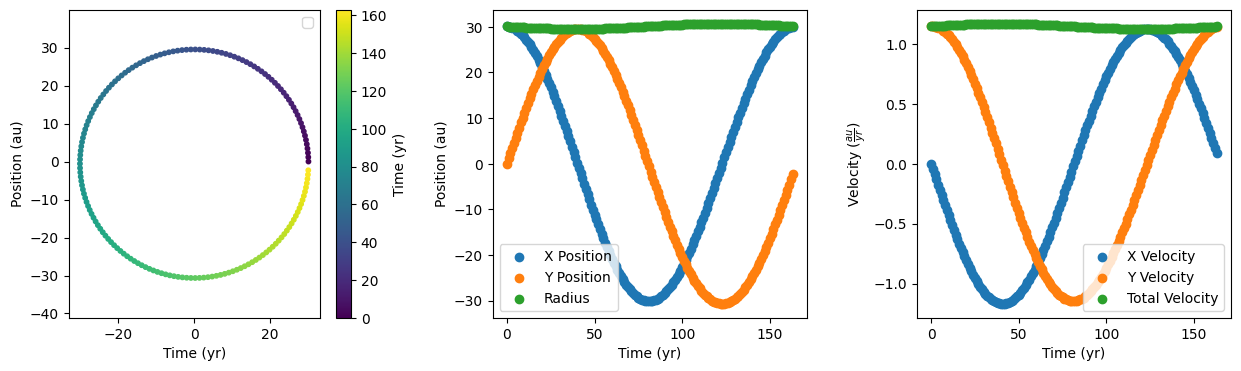

In [60]:
x0 =  30.06# initial x position in AU
y0 =  0# initial y position in AU
v0x =  0# initial x velocity in AU/yr
v0y =  (2 * np.pi * 30.06) / 164.8# initial y velocity in AU/yr
tmax = 164.8# time in years
dt = 1# time step in years


# call main
time, x, y, vx, vy = main(x0, y0, v0x, v0y, tmax, dt)